In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

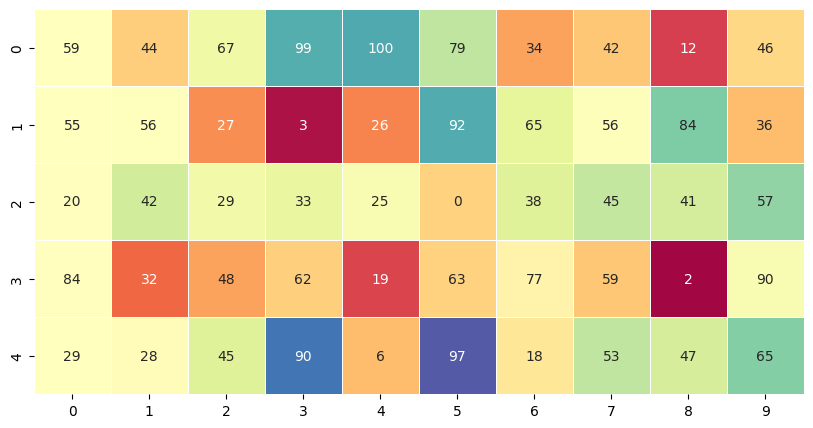

In [3]:
h = np.random.rand(5,10)*100
ylabel = ["0","1","2","3","4"]
xlabel= ["asdasfdafsdfa02","1","2","3","4","5","6","7","8","9"]


f, axs = plt.subplots(len(ylabel), 1, gridspec_kw={'hspace': 0, 'wspace':0}, sharex=True,figsize=(len(xlabel),len(ylabel)))

for i in range(len(ylabel)):
    hh = np.expand_dims(h[i],0)
    yl = ylabel[i]
    axs[i]=sns.heatmap(hh, annot=True,vmin=0, vmax=100, linewidth=.5,fmt=".0f", cmap="Spectral", square=True,  cbar=False, ax=axs[i], center=hh[0,0], xticklabels=range(0,10), yticklabels=[yl])

    # ax.tick_params(axis='both', which='both', length=3)
    # axs[i].set(xlabel="", ylabel="")
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    # ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# f.tight_layout()
# f.get_layout_engine().set(w_pad=4 / 72, h_pad=4 / 72, hspace=0,
                            # wspace=0) 
figure = axs[i].get_figure()    

figure.savefig('result.pdf', dpi=800)
figure.savefig('result.png', dpi=800)

/tmp/ipykernel_5799/2253878846.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn'])


Text(0, 0.5, 'Avg. accuracy [%]')

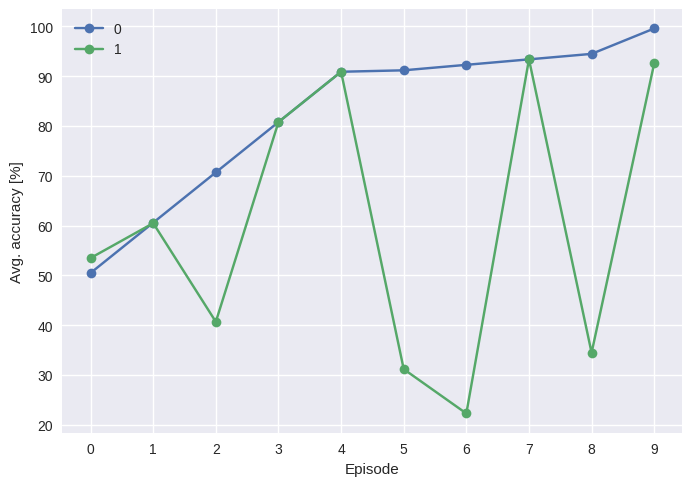

In [6]:
acc = [50.5,60.6,70.7,80.8,90.9,91.19, 92.29, 93.39,94.49, 99.59]
acc2 = [53.5,60.5,40.7,80.8,90.9,31.19, 22.29, 93.39,34.49, 92.59]
acc3 = []
acc3.append(acc)
acc3.append(acc2)
tasks = range(0,10,1)

plt.style.use(['seaborn'])
 
for i in range(2):
    plt.plot(tasks, acc3[i], "-o", label="{}".format(i))
plt.xticks(tasks, ["0","1","2","3","4","5","6","7","8","9"])
plt.legend()
plt.xlabel("Episode")
plt.ylabel("Avg. accuracy [%]")
# ax = sns.lineplot(x= tasks, y=acc)

In [5]:
a = ["a"+str(i) for i in range(13)]
print(a)

['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12']
